# TME 9 MOCKUS - SENYUZ


### Q1 - Implementation de C-moyennes floues et possibilistes

imports and simple 2D gaussian data

In [104]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

import dice_ml
import torch
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
import torch.nn.functional as F
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
import pylab

from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

from sklearn.ensemble import IsolationForest



(1003, 2)


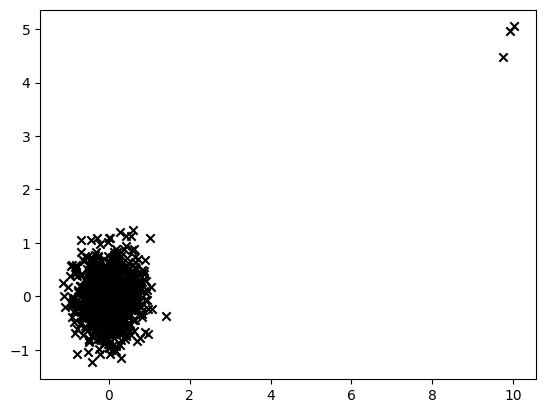

In [105]:
NB_classes = 4
markers = ['x', 'o', '+', "v", "*", '.']
centers = [[15, 0], [10, 0], [7, -15], [20, 0], [18, -30], [20, -35]]

data1, labels1 = datasets.make_blobs(n_samples=1000, centers = [[0,0]], random_state = 45, shuffle=True, cluster_std = 0.4)
data2, labels2 = datasets.make_blobs(n_samples=3, centers = [[10,5]], random_state = 45, shuffle=True, cluster_std = 0.2)


data = np.concatenate((data1, data2), axis = 0)
labels = np.concatenate((labels1, labels2), axis = 0)
print(data.shape)
dic = {'x':data[:,0], 'y' : data[:,1], 'target': labels}
df = pd.DataFrame(data = dic)
for i in range(2):
    plt.scatter(data[labels == i].T[0],data[labels == i].T[1], marker= markers[i], color = 'black')

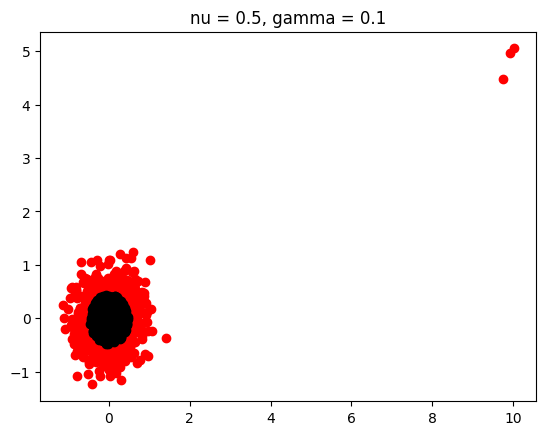

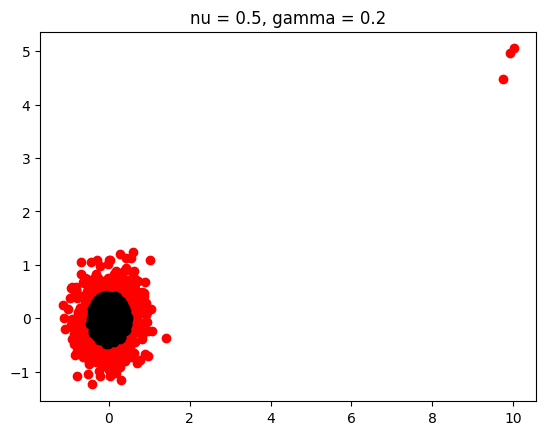

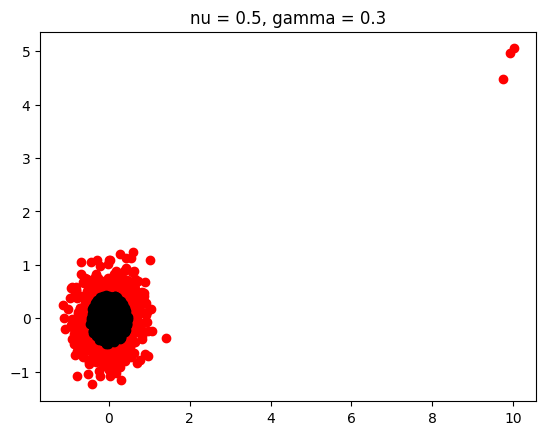

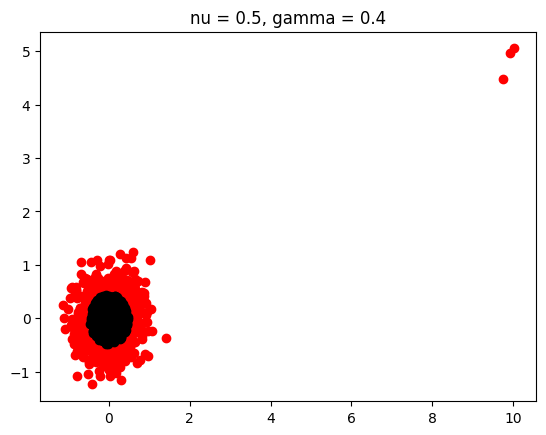

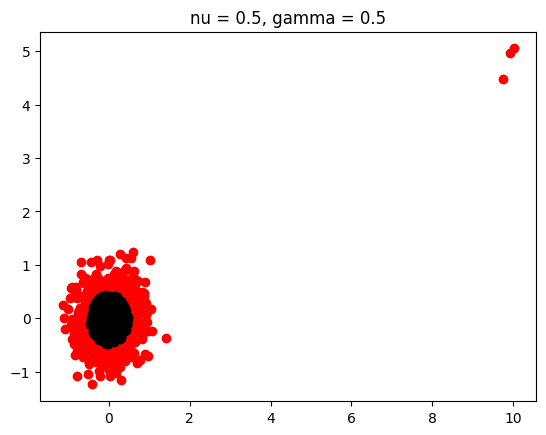

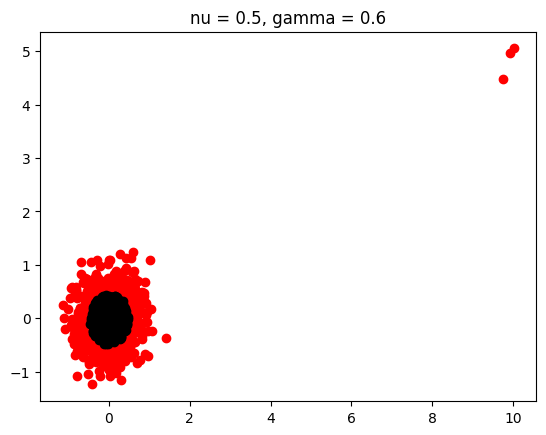

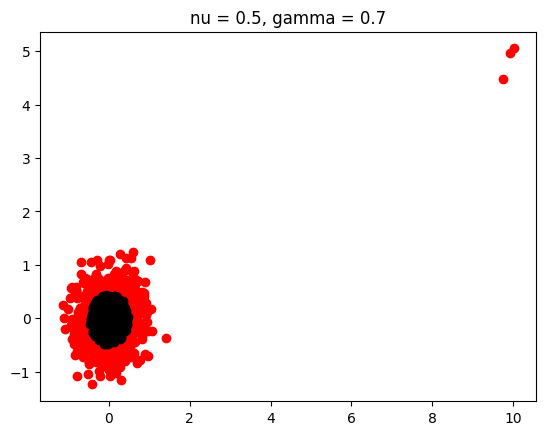

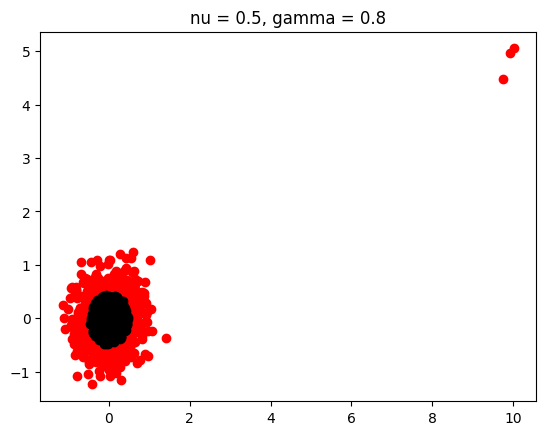

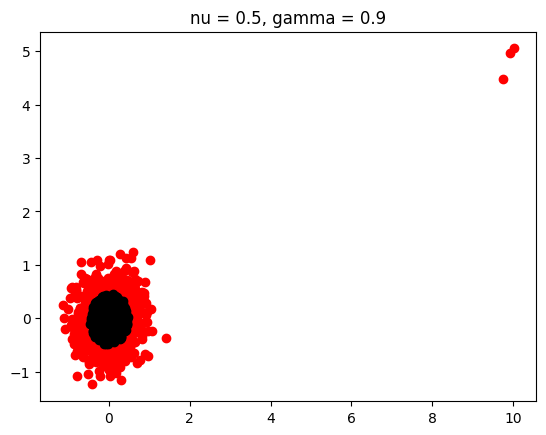

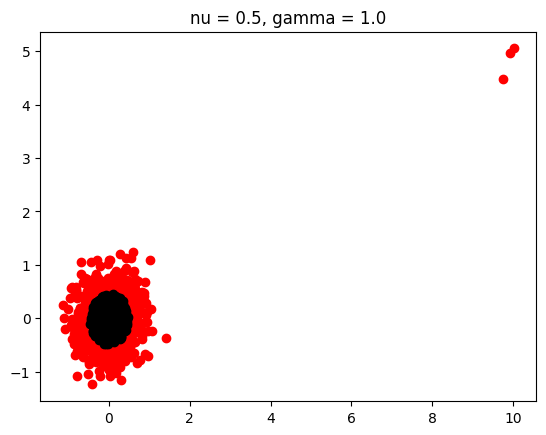

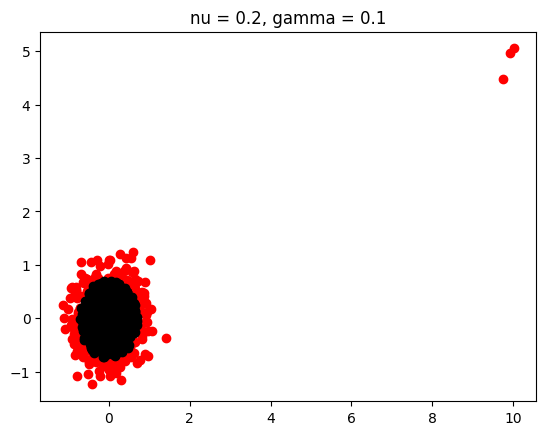

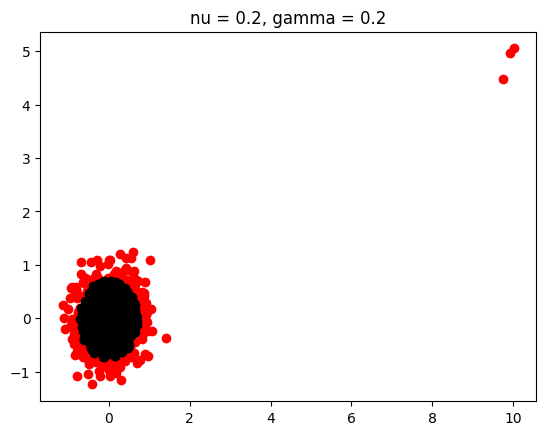

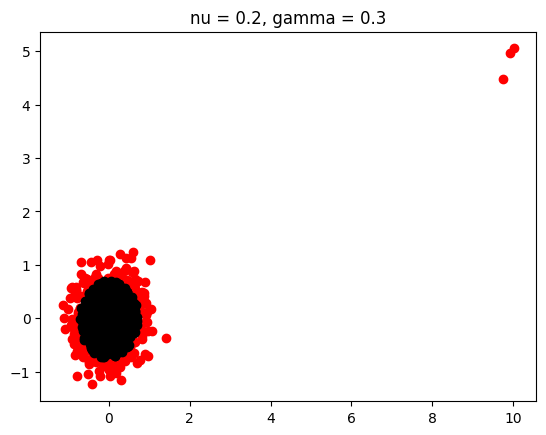

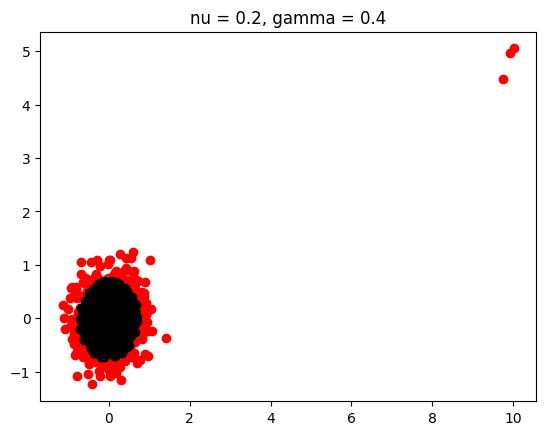

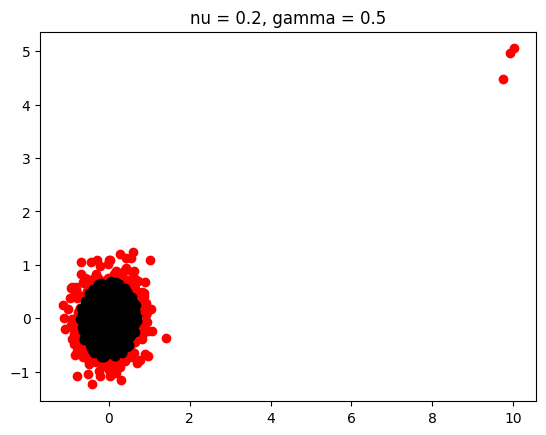

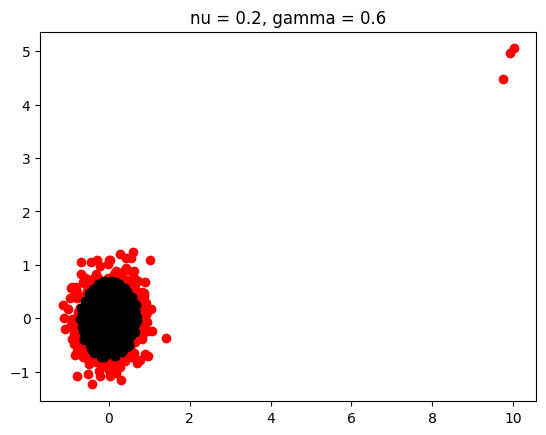

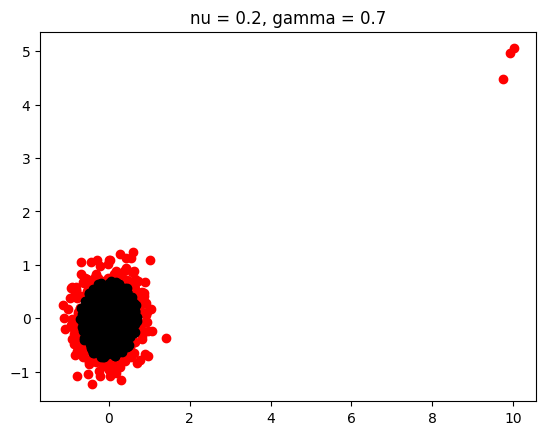

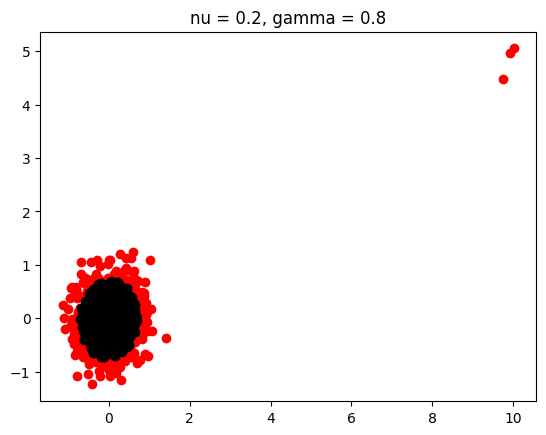

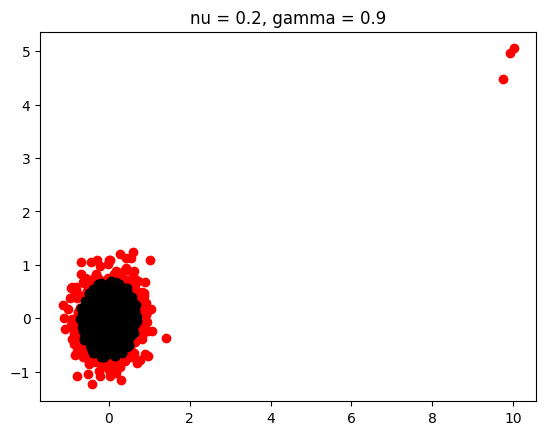

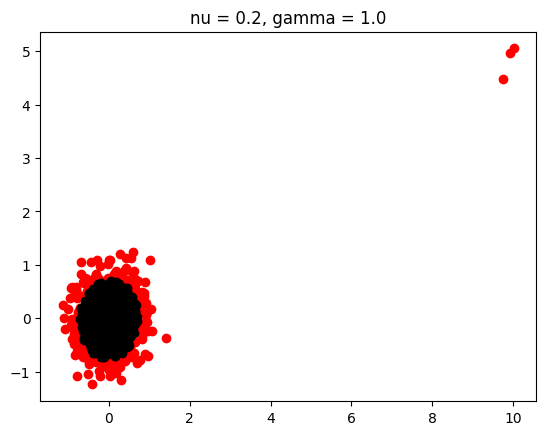

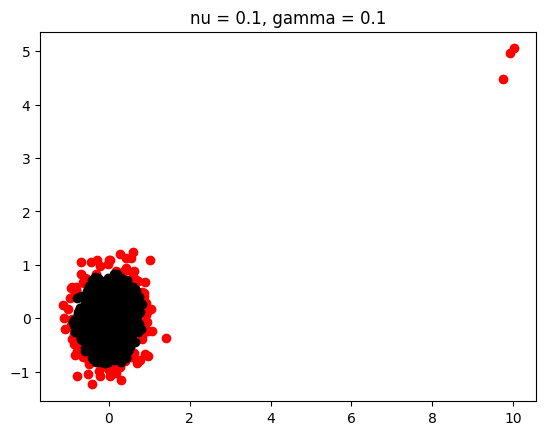

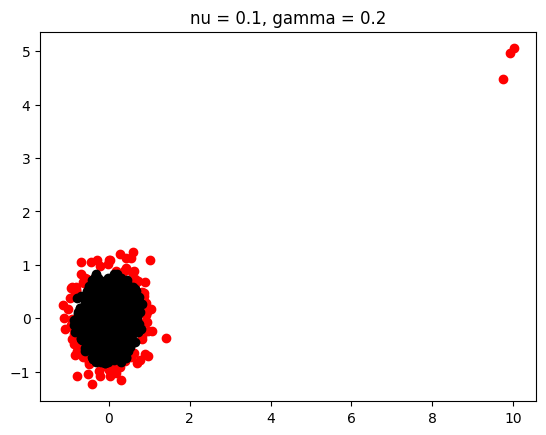

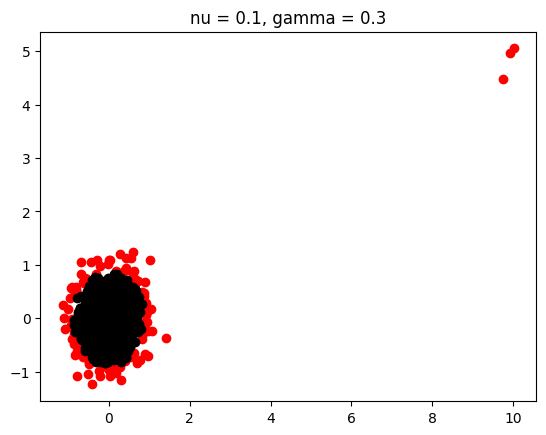

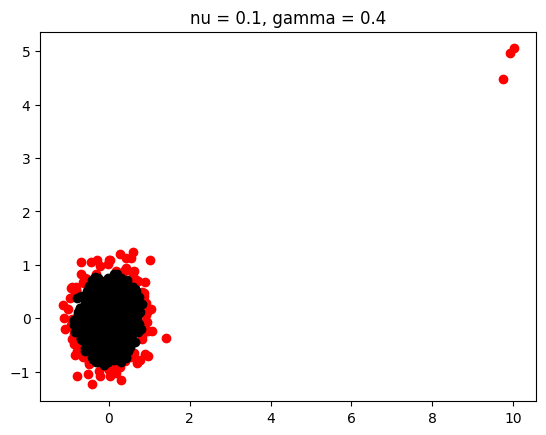

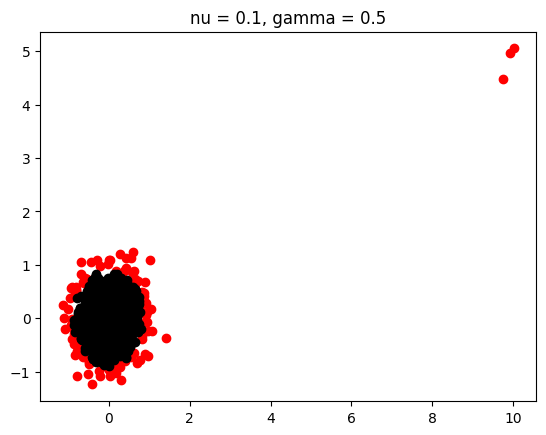

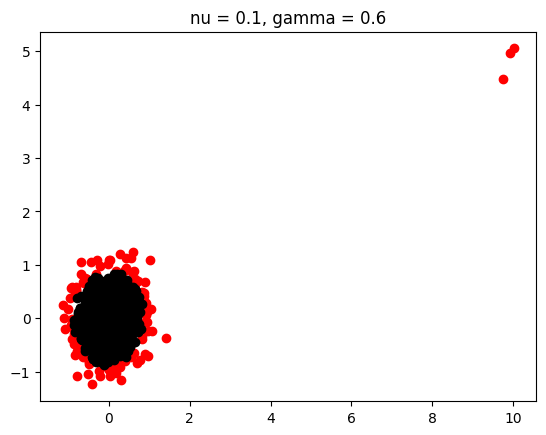

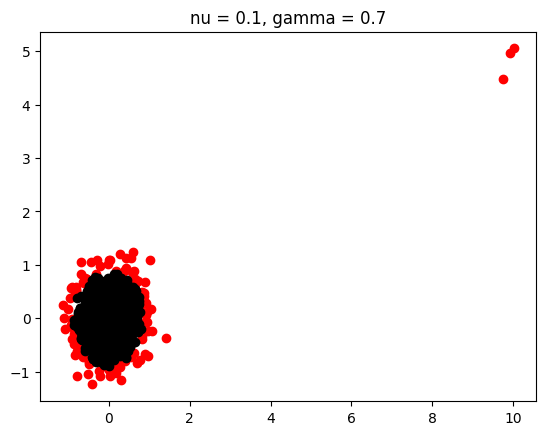

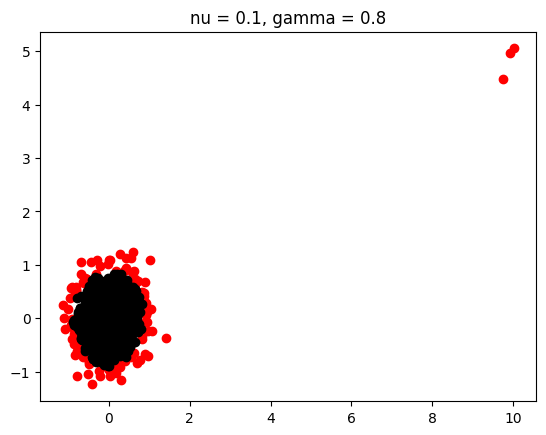

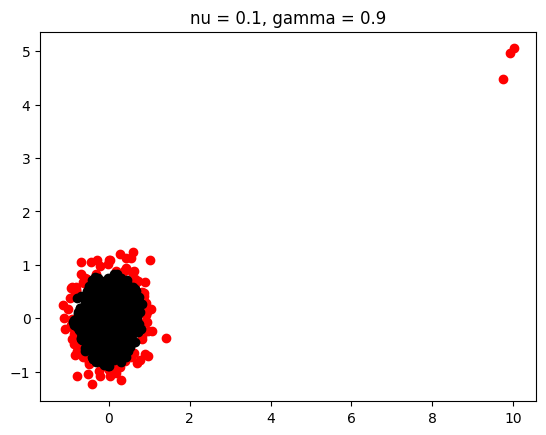

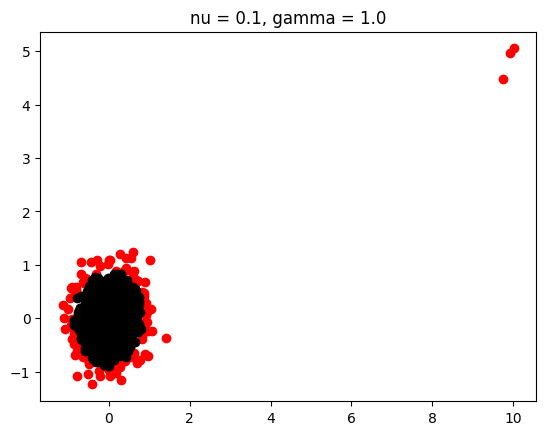

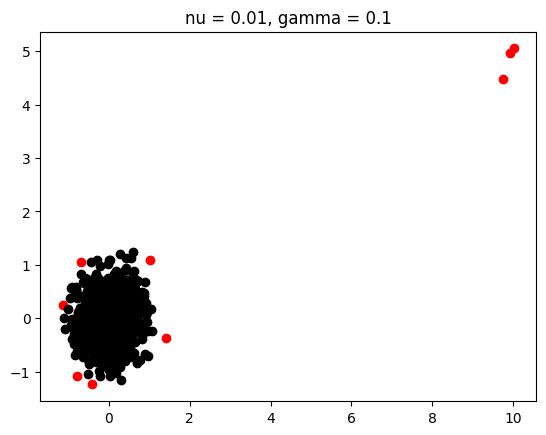

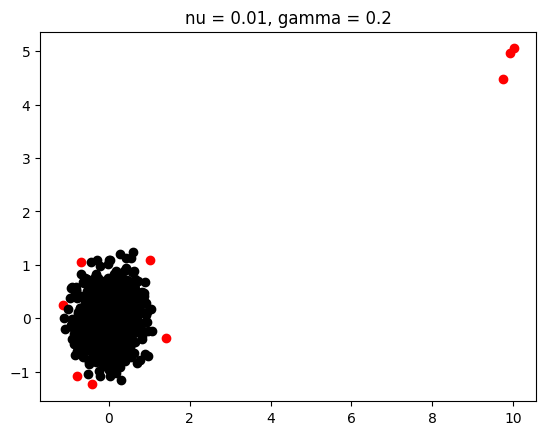

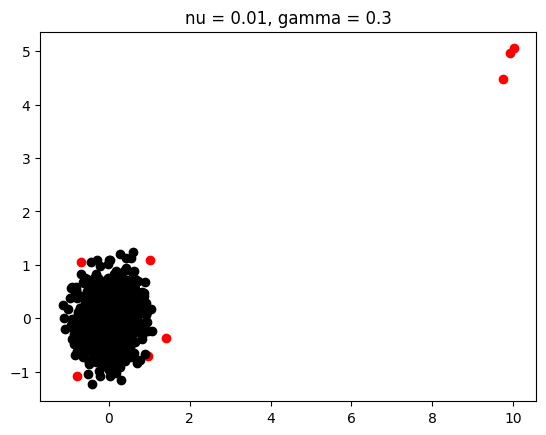

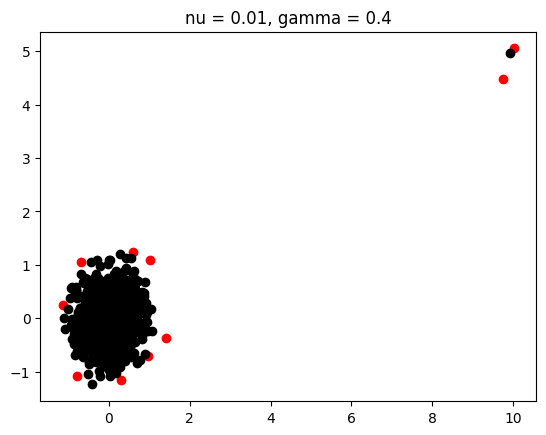

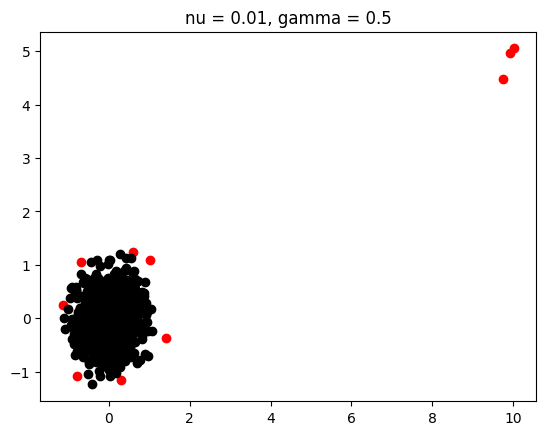

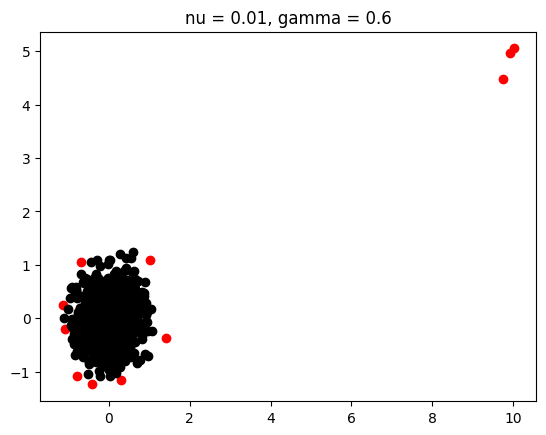

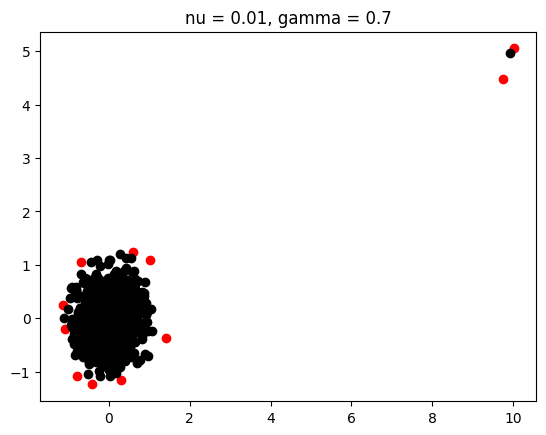

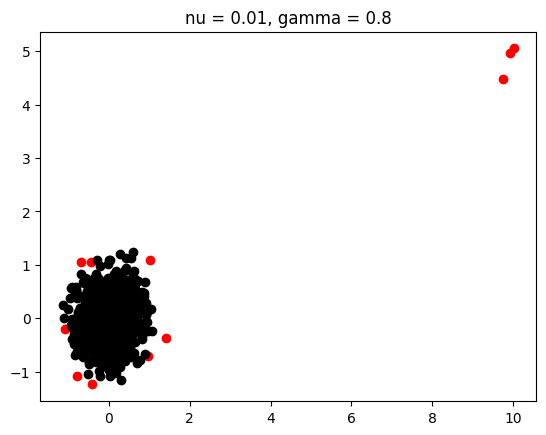

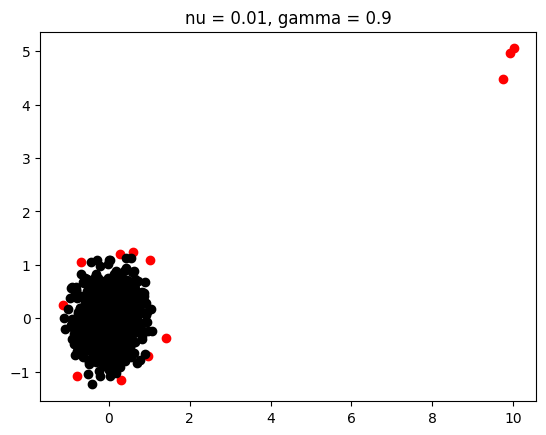

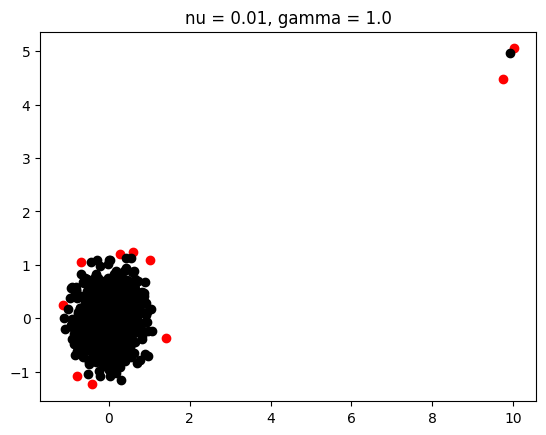

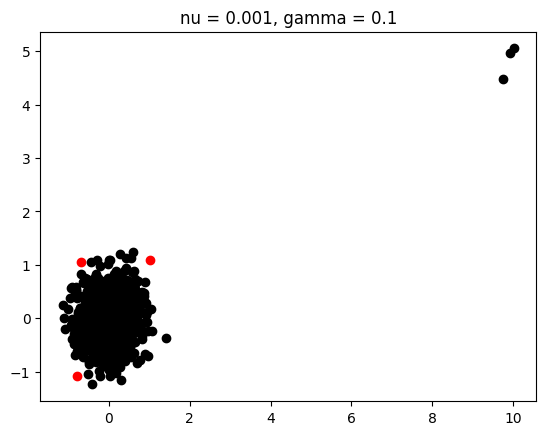

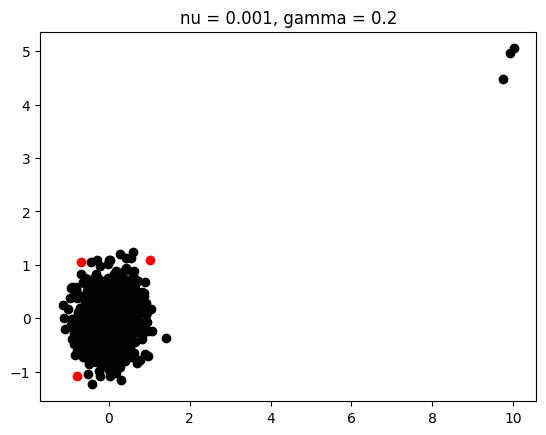

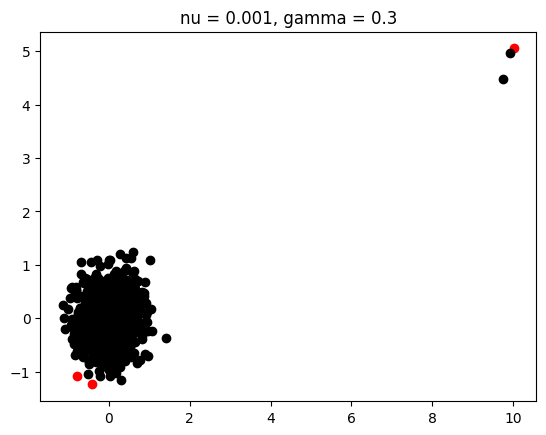

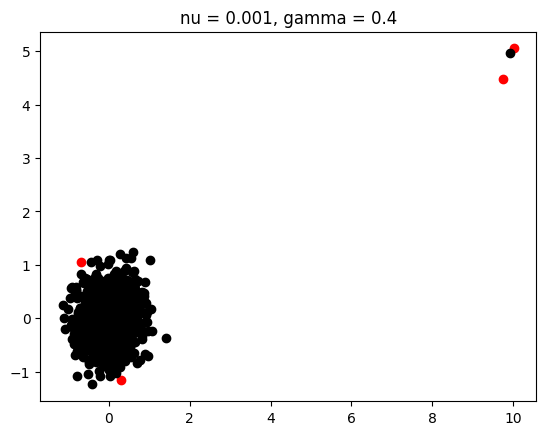

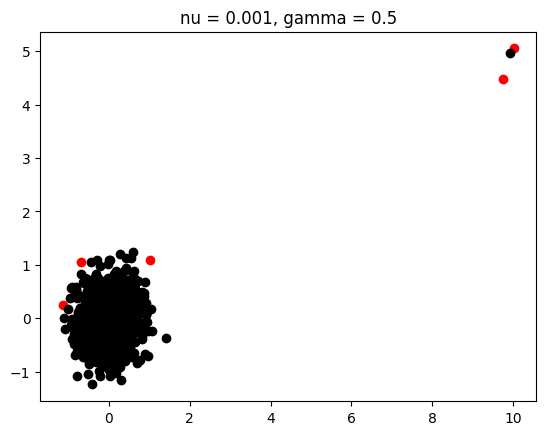

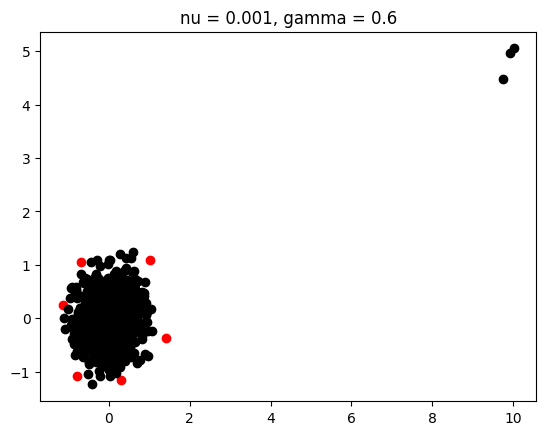

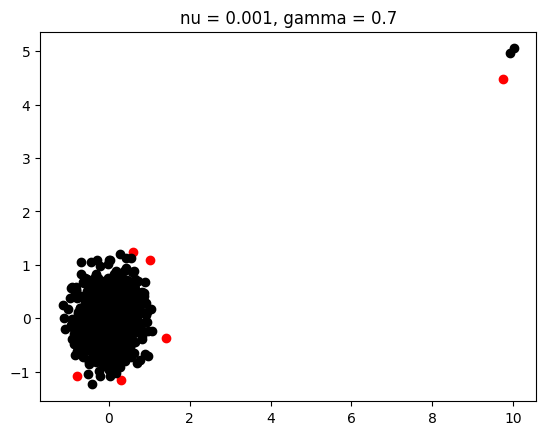

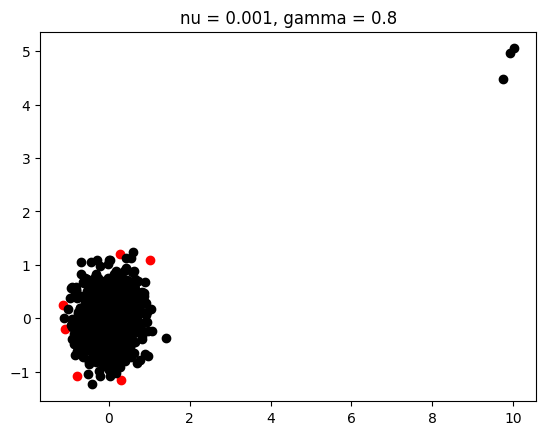

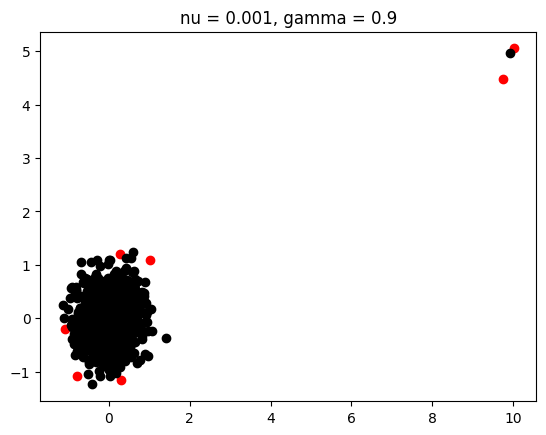

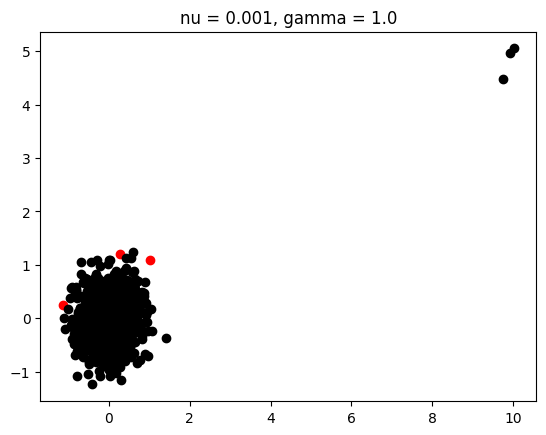

In [106]:

for nu in [0.5, 0.2, 1e-1, 1e-2, 1e-3]:
    for gamma in np.arange(1,11):
        gamma = gamma/10.
        clf = OneClassSVM(nu = nu, gamma= gamma)
        clf.fit(data)
        y = clf.predict(data)

        plt.scatter(data[y == -1].T[0],data[y == -1].T[1], marker= markers[i], color = 'red')
        plt.scatter(data[y == 1].T[0],data[y == 1].T[1], marker= markers[i], color = 'black')
        plt.title(f"nu = {nu}, gamma = {gamma}" )
        plt.show()

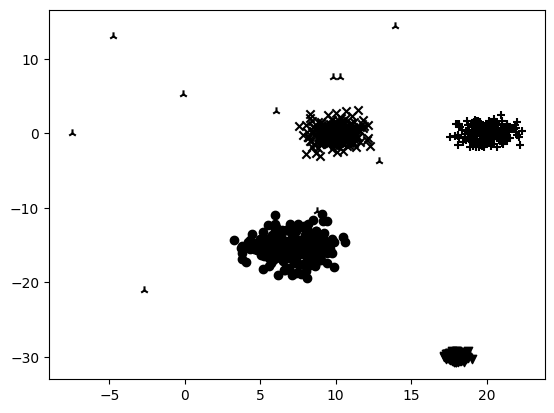

In [101]:
NB_classes = 4
markers = ['x', 'o', '+', "v", "*", '.', '1', '2', '3', '4']
centers = [[10, 0], [7, -15], [20, 0], [18, -30]]

data1, labels1 = datasets.make_blobs(n_samples=1000, centers = centers, random_state = 45, shuffle=True, cluster_std = [1, 1.5, .9, 0.3])
data2, labels2 = datasets.make_blobs(n_samples=10, centers = [[10,5]], random_state = 45, shuffle=True, cluster_std = 10)


data = np.concatenate((data1, data2), axis = 0)
labels = np.concatenate((labels1, np.array([7,7,7,7,7,7,7,7,7,7])), axis = 0)


dic = {'x':data[:,0], 'y' : data[:,1], 'target': labels}
df = pd.DataFrame(data = dic)
for i in range(8):
    plt.scatter(data[labels == i].T[0],data[labels == i].T[1], marker= markers[i], color = 'black')

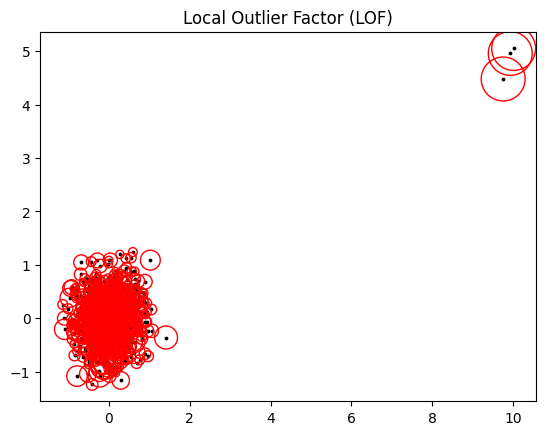

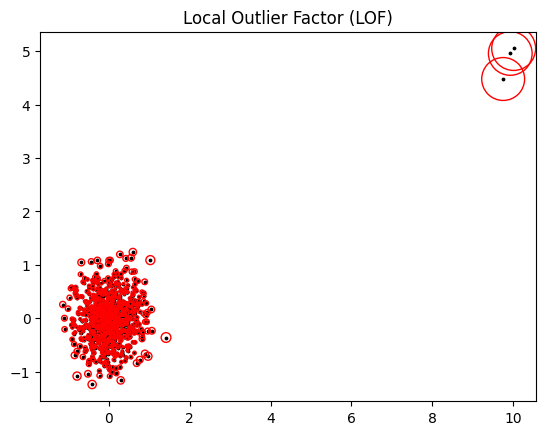

In [111]:
## TODO: finish


lof = LocalOutlierFactor()
y = lof.fit_predict(data)


xx, yy = np.meshgrid(np.linspace(-10 , 5, 500), np.linspace(-5, 5, 500))


#for k in range(3, 21):
for k in [3, 20] :
    lof = LocalOutlierFactor(n_neighbors = k)
    y = lof.fit_predict(data)

    
    top = data.T[1].ravel() + data.T[0].ravel()  
    bottom = np.zeros_like(top)
    width = depth = 1
    X_scores = lof.negative_outlier_factor_
    
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(data[:, 0], data[:, 1], color="k", s=3.0, label="Data points")
    # plot circles with radius proportional to the outlier scores
    radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
    plt.scatter(
        data[:, 0],
        data[:, 1],
        s=1000 * radius,
        edgecolors="r",
        facecolors="none",
        label="Outlier scores",
    )
    
    #ax.bar3d(data.T[0],data.T[1], lof.negative_outlier_factor_, width, depth, top, zsort='average')
    plt.show()


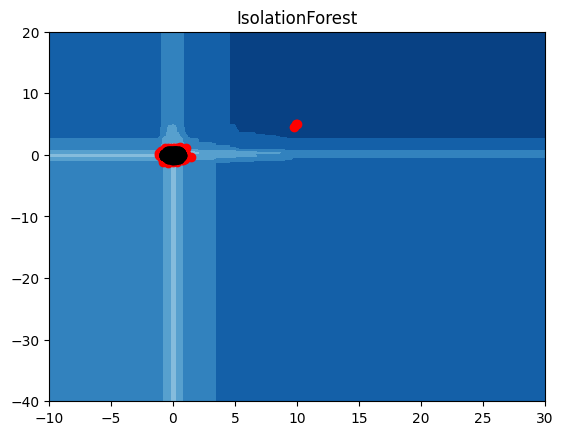

In [112]:


clf = IsolationForest(random_state=0).fit(data)
y = clf.predict(data)

xx, yy = np.meshgrid(np.linspace(-10, 30, 500), np.linspace(-40, 20, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.scatter(data[y == -1].T[0],data[y == -1].T[1], marker= markers[i], color = 'red')
plt.scatter(data[y == 1].T[0],data[y == 1].T[1], marker= markers[i], color = 'black')

plt.show()
